In [1]:
import pandas as pd
dfm = pd.read_csv("results_final.csv")

print(dfm.describe)


<bound method NDFrame.describe of         Mean       Std      skew       kurt    zcr  Negative  Positive  \
0   -0.03170  0.238631  1.669290  13.772643   8125   29205.0     19778   
1   -0.03990  0.238227  1.767346  15.575317   8109   29883.0     19100   
2   -0.03619  0.233956  2.054477  19.289000   7629   30691.0     18292   
3   -0.04270  0.229507  1.893025  14.514906   7858   29591.0     19392   
4   -0.04253  0.223480  2.032298  15.586533   7024   29953.0     19030   
..       ...       ...       ...        ...    ...       ...       ...   
795 -0.03889  0.136246 -0.706945   6.850523  11630   31290.0     17693   
796 -0.03858  0.132444 -0.555816   7.440042  11920   31260.0     17723   
797 -0.04193  0.157063 -0.530123   7.656655  11730   31673.0     17310   
798 -0.03959  0.137075 -0.285148   8.793275  11158   31282.0     17701   
799 -0.03879  0.139415 -0.720221   7.687124  11550   31986.0     17701   

        Ratio  Target  
0    1.476641       0  
1    1.564555       0  
2    

In [2]:
dfm = dfm.drop('Positive',axis='columns')
dfm = dfm.drop('Negative',axis='columns')
dfm

,Mean,Std,skew,kurt,zcr,Ratio,Target
0,-0.03170,0.238631,1.669290,13.772643,8125,1.476641,0
1,-0.03990,0.238227,1.767346,15.575317,8109,1.564555,0
2,-0.03619,0.233956,2.054477,19.289000,7629,1.677837,0
3,-0.04270,0.229507,1.893025,14.514906,7858,1.525939,0
4,-0.04253,0.223480,2.032298,15.586533,7024,1.573988,0
...,...,...,...,...,...,...,...
795,-0.03889,0.136246,-0.706945,6.850523,11630,1.768496,7
796,-0.03858,0.132444,-0.555816,7.440042,11920,1.763810,7
797,-0.04193,0.157063,-0.530123,7.656655,11730,1.829752,7
798,-0.03959,0.137075,-0.285148,8.793275,11158,1.767245,7


In [3]:
dfm.dtypes

Mean      float64
Std       float64
skew      float64
kurt      float64
zcr         int64
Ratio     float64
Target      int64
dtype: object

dfm = dfm.drop('Mean',axis='columns')
dfm

In [4]:
X = dfm.drop('Target',axis='columns')
y = dfm.Target

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 2.43098071,  1.17458732,  0.24404994,  0.48536876, -0.60411018,
        -1.65761528],
       [-0.41335682,  1.16776583,  0.34154149,  0.80961834, -0.61375508,
        -1.4081152 ],
       [ 0.87353248,  1.09558592,  0.62702178,  1.47760366, -0.90310226,
        -1.08662071],
       ...,
       [-1.11750379, -0.20364573, -1.94271637, -0.61472265,  1.56900765,
        -0.655489  ],
       [-0.30582699, -0.54137725, -1.69914949, -0.41027723,  1.22420227,
        -0.83288288],
       [-0.02833064, -0.50185264, -2.1317212 , -0.60924205,  1.46050246,
        -0.83288288]])

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 2.43098071,  1.17458732,  0.24404994,  0.48536876, -0.60411018,
        -1.65761528],
       [-0.41335682,  1.16776583,  0.34154149,  0.80961834, -0.61375508,
        -1.4081152 ],
       [ 0.87353248,  1.09558592,  0.62702178,  1.47760366, -0.90310226,
        -1.08662071],
       ...,
       [-1.11750379, -0.20364573, -1.94271637, -0.61472265,  1.56900765,
        -0.655489  ],
       [-0.30582699, -0.54137725, -1.69914949, -0.41027723,  1.22420227,
        -0.83288288],
       [-0.02833064, -0.50185264, -2.1317212 , -0.60924205,  1.46050246,
        -0.83288288]])

In [7]:
from prettytable import PrettyTable
tab = PrettyTable()
tab.title = 'ML Model Scores with different splits'
tab.field_names = ['Split Ratio', 'Decision tree', 'Logistic Regression', 'Naive Bayes', 'KNC', 'RFC', 'SVC']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from  sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree

splits = [0.1, 0.2, 0.3]

for split in splits:
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = split, random_state = 40)

    model_knn = KNeighborsClassifier(n_neighbors=13)
    model_knn.fit(X_train, y_train)
    knnscore = model_knn.score(X_test, y_test)

    model_rfc = RandomForestClassifier(n_estimators=800)
    model_rfc.fit(X_train, y_train)
    rfcscore = model_rfc.score(X_test, y_test)

    model_svc = SVC(C=36, kernel="rbf")
    model_svc.fit(X_train, y_train)
    svcscore = model_svc.score(X_test, y_test)

    model_nb = GaussianNB()
    model_nb.fit(X_train, y_train)
    nbscore = model_nb.score(X_test, y_test)

    model_lr = LogisticRegression()
    model_lr.fit(X_train, y_train)
    lrscore = model_lr.score(X_test, y_test)

    model_dt = tree.DecisionTreeClassifier()
    model_dt.fit(X_train, y_train)
    dtscore = model_dt.score(X_test, y_test)

    tab.add_row([f"Split: {split}", dtscore, lrscore, nbscore, knnscore, rfcscore, svcscore])

In [9]:
print(tab)

+-------------------------------------------------------------------------------------------------------------------------------------+
|                                                ML Model Scores with different splits                                                |
+-------------+--------------------+---------------------+-------------+--------------------+--------------------+--------------------+
| Split Ratio |   Decision tree    | Logistic Regression | Naive Bayes |        KNC         |        RFC         |        SVC         |
+-------------+--------------------+---------------------+-------------+--------------------+--------------------+--------------------+
|  Split: 0.1 |       0.725        |        0.775        |    0.775    |       0.7375       |        0.9         |       0.825        |
|  Split: 0.2 |        0.8         |        0.7625       |    0.7875   |       0.825        |      0.89375       |      0.83125       |
|  Split: 0.3 | 0.8083333333333333 |  0.77916666

In [10]:
from sklearn.metrics import confusion_matrix

y_pred_dt = model_dt.predict(X_test)
y_pred_lr = model_lr.predict(X_test)
y_pred_nb = model_nb.predict(X_test)
y_pred_knn = model_knn.predict(X_test)
y_pred_rfc = model_rfc.predict(X_test)
y_pred_svc = model_svc.predict(X_test)

cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
cm_svc = confusion_matrix(y_test, y_pred_svc)


Text(0.5, 1.0, 'Naive Bayes')

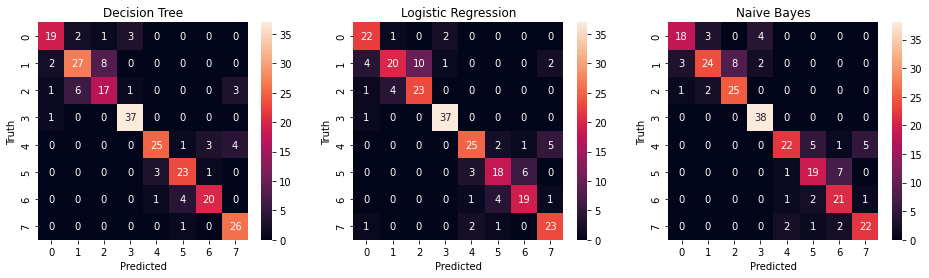

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(16,4))

plt.subplot(131)
sn.heatmap(cm_dt, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Decision Tree')

plt.subplot(132)
sn.heatmap(cm_lr, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Logistic Regression')

plt.subplot(133)
sn.heatmap(cm_nb, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Naive Bayes')


Text(0.5, 1.0, 'SVMClassifier')

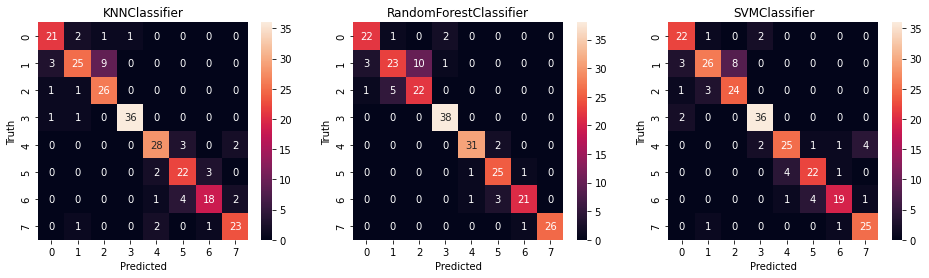

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(16,4))

plt.subplot(131)
sn.heatmap(cm_knn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('KNNClassifier')

plt.subplot(132)
sn.heatmap(cm_rfc, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('RandomForestClassifier')

plt.subplot(133)
sn.heatmap(cm_svc, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('SVMClassifier')